# Лабораторная работа 3. Pandas, метод ближайших соседей и решающие деревья.

Name: Alinur Sabit

Student ID: 16BD02113

Email: alinur.sabit.9@gmail.com

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
from sklearn.metrics import roc_auc_score

## Часть 1: Pandas

#### Ответьте на вопросы о данных по авиарейсам в США.

Данные: http://stat-computing.org/dataexpo/2009/2008.csv.bz2
(обратите внимание, что распаковывать этот файл не обязательно — функция `pandas.read_csv` умеет читать из архивов автоматически)

Описание: http://stat-computing.org/dataexpo/2009/the-data.html

1. Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)
2. Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.
3. Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?
4. Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?
5. Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?
6. Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [3]:
df = pd.read_csv("2008.csv.bz2")

In [4]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [5]:
cancelled = df[df.Cancelled == 1]

In [6]:
cancelled.CancellationCode.describe()

count     137434
unique         4
top            B
freq       54904
Name: CancellationCode, dtype: object

In [7]:
distance = df.Distance
distance.describe()

NameError: name 'data' is not defined

In [8]:
df[df.Distance == df.Distance.min()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2547298,2008,5,15,4,2037.0,1800,2125.0,1900,OH,4988,N806CA,48.0,60.0,31.0,145.0,157.0,JFK,LGA,11,10.0,7.0,0,NaN,0,145.0,0.0,0.0,0.0,0.0
4392215,2008,8,10,7,1315.0,1220,1415.0,1320,OH,5572,N819CA,60.0,60.0,14.0,55.0,55.0,JFK,LGA,11,8.0,38.0,0,NaN,0,55.0,0.0,0.0,0.0,0.0


In [9]:
sorted(df[df.FlightNum == 4988].Distance.unique())

[11, 96, 223, 321, 414, 712, 834, 903]

In [10]:
sorted(df[df.FlightNum == 5572].Distance.unique())

[11, 134, 329, 363, 508, 544, 669]

In [11]:
df[(df.Origin == 'JFK') & (df.Dest ==  'LGA')]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2547298,2008,5,15,4,2037.0,1800,2125.0,1900,OH,4988,N806CA,48.0,60.0,31.0,145.0,157.0,JFK,LGA,11,10.0,7.0,0,NaN,0,145.0,0.0,0.0,0.0,0.0
4392215,2008,8,10,7,1315.0,1220,1415.0,1320,OH,5572,N819CA,60.0,60.0,14.0,55.0,55.0,JFK,LGA,11,8.0,38.0,0,NaN,0,55.0,0.0,0.0,0.0,0.0


In [12]:
df.Origin.describe()

count     7009728
unique        303
top           ATL
freq       414513
Name: Origin, dtype: object

In [13]:
len(df[df.Origin == 'ATL']), len(df[df.Origin == 'ATL'])/len(df)

(414513, 0.05913396354323591)

In [14]:
origin_groupby = df.groupby('Origin')

In [15]:
mean_airtime = origin_groupby.AirTime.mean()
mean_airtime

Origin
ABE     89.057518
ABI     36.789977
ABQ     91.657166
ABY     35.379759
ACK     50.692124
ACT     29.875977
ACV     58.850658
ACY    108.848214
ADK    151.423913
ADQ     41.987934
AEX     68.543556
AGS     36.933814
AKN     37.321429
ALB    101.860527
ALO     36.373134
AMA     56.196001
ANC    156.163749
ASE     48.307996
ATL     93.320419
ATW     50.696326
AUS    101.266600
AVL     69.899021
AVP     94.665204
AZO     34.846602
BDL    118.701612
BET     57.597815
BFL     64.024511
BGM     66.582260
BGR     90.211095
BHM     82.290713
          ...    
SPS     29.490040
SRQ    103.083807
STL     99.294409
STT    168.681929
STX    168.101176
SUN     48.221851
SUX     44.918919
SWF    132.768826
SYR     84.524087
TEX     93.124183
TLH     59.293080
TOL     48.295047
TPA    117.917963
TRI     47.871046
TUL     80.876802
TUP     42.900000
TUS     92.801864
TVC     49.328770
TWF     41.316563
TXK     43.796312
TYR     30.372715
TYS     81.030894
VLD     45.158351
VPS     75.231116
WRG

In [18]:
mean_airtime.argmax(), mean_airtime.max()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


('SJU', 203.8508426966292)

In [19]:
considered_airports = df.groupby('Origin').filter(lambda x: len(x) >= 1000)

In [20]:
delay_by_airport = considered_airports.groupby('Origin').DepDelay.agg(lambda x: (x > 0).sum()/len(x))
delay_by_airport.head()

Origin
ABE    0.253589
ABI    0.202632
ABQ    0.390415
ABY    0.346119
ACT    0.254892
Name: DepDelay, dtype: float64

In [24]:
delay_by_airport.argmax(), delay_by_airport.max()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


('DAL', 0.5786418928942293)

## Часть 2: метрические методы и категориальные признаки

Все дальнейшие эксперименты предлагается проводить на данных соревнования Amazon Employee Access Challenge: https://www.kaggle.com/c/amazon-employee-access-challenge

В данной задаче предлагается предсказать, будет ли одобрен запрос сотрудника на получение доступа к тому или иному ресурсу. Все признаки являются категориальными.

Для удобства данные можно загрузить по ссылке: https://www.dropbox.com/s/q6fbs1vvhd5kvek/amazon.csv

Сразу прочитаем данные и создадим разбиение на обучение и контроль:

In [25]:
data = pd.read_csv('amazon.csv')
data.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [26]:
data.shape

(32769, 10)

In [32]:
# доля положительных примеров
data.ACTION.mean()

0.9421099209618847

In [34]:
# число значений у признаков
for col_name in data.columns:
    print (col_name, len(data[col_name].unique()))

ACTION 2
RESOURCE 7518
MGR_ID 4243
ROLE_ROLLUP_1 128
ROLE_ROLLUP_2 177
ROLE_DEPTNAME 449
ROLE_TITLE 343
ROLE_FAMILY_DESC 2358
ROLE_FAMILY 67
ROLE_CODE 343


In [ ]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0],
                                                    test_size=0.3, random_state=241)

In [ ]:
# Выделение тренировочной выборки ничего не испортило
for col_name in X_train.columns:
    print(col_name, len(data[col_name].unique()))

#### 1. Реализуйте три функции расстояния на категориальных признаках, которые обсуждались на втором семинаре.

Проще всего будет определить метрики как [user-defined distance](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html), после чего воспользоваться реализацией kNN из sklearn (в этом случае используйте функцию predict_proba). Можно реализовать метод k ближайших соседей и самостоятально — в этом случае учитите, что он должен возвращать оценку вероятности, то есть отношение объектов первого класса среди соседей к числу соседей).

Постарайтесь уделить особое внимание эффективности кода — при реализации метрик "в лоб" вы можете столкнуться с очень большим временем выполнения.

#### Подсчитайте для каждой из метрик качество на тестовой выборке `X_test` при числе соседей $k = 10$. Мера качества — AUC-ROC.

#### Какая функция расстояния оказалась лучшей?

In [ ]:
import sklearn.neighbors

In [ ]:
#Индикатор совпадения
def match_indicator_metric(x, y):
    return (x != y).sum()

In [ ]:
clf = sklearn.neighbors.KNeighborsClassifier(metric = match_indicator_metric, n_jobs=-1, n_neighbors=10)
clf.fit(X_train, y_train)

In [ ]:
y_score = clf.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, y_score[:,1])

#### 2 (бонус). Подберите лучшее (на тестовой выборке) число соседей $k$ для каждой из функций расстояния. Какое наилучшее качество удалось получить?

Для подбора можно использовать любые средства из sklearn.

#### 3. Реализуйте счетчики (http://blogs.technet.com/b/machinelearning/archive/2015/02/17/big-learning-made-easy-with-counts.aspx), которые заменят категориальные признаки на вещественные.

А именно, каждый категориальный признак нужно заменить на три: 
1. Число `counts` объектов в обучающей выборке с таким же значением признака.
2. Число `successes` объектов первого класса ($y = 1$) в обучающей выборке с таким же значением признака.
3. Сглаженное отношение двух предыдущих величин: (`successes` + 1) / (`counts` + 2).

Поскольку признаки, содержащие информацию о целевой переменной, могут привести к переобучению, может оказаться полезным сделать *фолдинг*: разбить обучающую выборку на $n$ частей, и для $i$-й части считать `counts` и `successes` по всем остальным частям. Для тестовой выборки используются счетчики, посчитанные по всей обучающей выборке. Реализуйте и такой вариант. Можно использовать $n = 3$.

#### Посчитайте на тесте AUC-ROC метода $k$ ближайших соседей с евклидовой метрикой для выборки, где категориальные признаки заменены на счетчики. Сравните по AUC-ROC два варианта формирования выборки — с фолдингом и без. Не забудьте подобрать наилучшее число соседей $k$.

In [ ]:
defdef calculate_auc_knncalculate (n_neighbors, X_train, y_train, X_test, y_test):
    clf - sklearn,neighbors.KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)
    return roc_auc_score(y_test, y_score[:,1])

In [ ]:
#без счетчиклв
calculate_auc_knn(10, X_train, y_train, X_test, y_test)

#### 4. Добавьте в исходную выборку парные признаки — то есть для каждой пары $(f_i, f_j)$, $i < j$ исходных категориальных признаков добавьте новый категориальный признак $f_{ij}$, значение которого является конкатенацией значений $f_i$ и $f_j$ (желательно через какой-нибудь специальный символ во избежание коллизий). Посчитайте счетчики для этой выборки, найдите качество метода $k$ ближайших соседей с наилучшим $k$ (с фолдингом и без).

## Часть 3: Решающие деревья и леса

#### 1. Возьмите из предыдущей части выборку с парными признаками, преобразованную с помощью счетчиков без фолдинга. Настройте решающее дерево, подобрав оптимальные значения параметров `max_depth` и `min_samples_leaf`. Какой наилучший AUC-ROC на контроле удалось получить?

#### 2. Настройте случайный лес, подобрав такое число деревьев `n_estimators`, при котором ошибка выходит на асимптоту. Какое качество на тестовой выборке он дает?

#### 3. Возьмите выборку с парными признаками, для которой счетчики посчитаны с фолдингом. Обучите на ней случайный лес, подобрав число деревьев. Какое качество на тестовой выборке он дает? Чем вы можете объяснить изменение результата по сравнению с предыдущим пунктом?

Здесь вы можете поделиться своими мыслями о задании.

In [ ]:
начиная с середины я вообще не понимал что надо делать, даже с помощью гугл. 
Я думаю, что еще не дозрел и не подготовлен к таким сложным заданиям.
Предлагаю укрепить нашу базу и изучать алгоритмы, данные в этих заданиях.
В первый раз когда посмторел на задания мои глаза были пустыми как у рыбы.

А здесь вставьте смешную картинку.

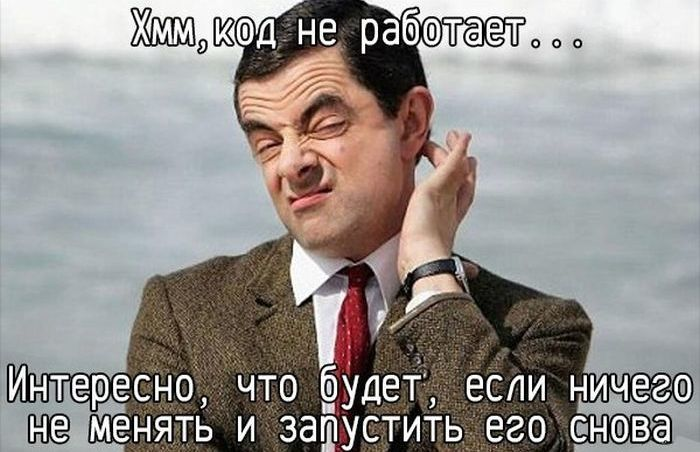

In [45]:
from IPython.display import Image
Image("kak-rabotayut-programmisty-open.jpg", width = 300)

А здесь посоветуйте преподавателям хороший фильм или сериал.